# Applied Data Science 1-Assignment 1

### Topic : "Credit Card Analysis: Balances, Spending Patterns, and Payments"

In [628]:
# importing dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import skew, kurtosis,t

In [630]:
# reading the dataset,and displaying first 5 entries

data= pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [632]:
#Checking for any NaN values present in the dataset

print(data.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [634]:
#droping the NaN values from the dataset

data_cleaned = data.dropna()
print(data_cleaned.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [636]:
#statistical summary for numerical columns in dataset

data_cleaned.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## STATISTICAL ANALYSIS

In [639]:
def calculate_statistics(data_cleaned):
    """
    Calculate the mean, median, std,skewness,kurtosis for numeric columns.   
    
    """
    # By using numpy module selecting only numeric columns in dataset
    num_df = data.select_dtypes(include=[np.number])
    
    # Calculate mean, median, and standard deviation for the nunerical columns derived
    statistics_analysis = {
        "mean": num_df.mean(),
        "median": num_df.median(),
        "standard deviation": num_df.std(),
        "skewness": num_df.skew(),
        "kurtosis": num_df.kurt()
    }
    
    # The statistics is obtained has dictonary,converting dictonary to readable dataframe 
    statics_df = pd.DataFrame(statistics_analysis)
    
    return statics_df

In [641]:
#Calling the function to execute statistics
calculate_statistics(data_cleaned)

,mean,median,standard deviation,skewness,kurtosis
BALANCE,1564.474828,873.385231,2081.531879,2.393386,7.674751
BALANCE_FREQUENCY,0.877271,1.000000,0.236904,-2.023266,3.092370
PURCHASES,1003.204834,361.280000,2136.634782,8.144269,111.388771
ONEOFF_PURCHASES,592.437371,38.000000,1659.887917,10.045083,164.187572
INSTALLMENTS_PURCHASES,411.067645,89.000000,904.338115,7.299120,96.575178
CASH_ADVANCE,978.871112,0.000000,2097.163877,5.166609,52.899434
PURCHASES_FREQUENCY,0.490351,0.500000,0.401371,0.060164,-1.638631
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.083333,0.298336,1.535613,1.161846
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.166667,0.397448,0.509201,-1.398632
CASH_ADVANCE_FREQUENCY,0.135144,0.000000,0.200121,1.828686,3.334734


## HISTOGRAM: CREDIT CARD LIMIT DISTRIBUTION

In [644]:
def plot_distribution_credit_limit(data):
    """
    The function plots the distribution of credit limits.
    """
    plt.figure(figsize=(10, 6))

    # Plots histogram for column CREDIT_LIMIT with ten bins
    plt.hist(data['CREDIT_LIMIT'], bins=10, color='purple', alpha=0.7)

    # Styling the plot with appropriate title
    plt.title('Distribution of credit card limits')

    # Styling the plot with appropriate labels
    plt.xlabel('Credit Card Limit')
    plt.ylabel('Number of Customers')

    plt.show()


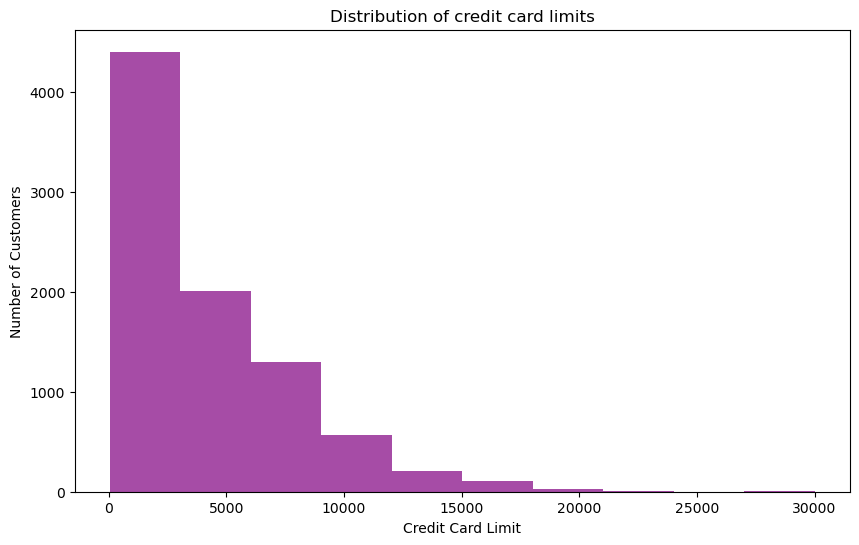

In [664]:
# calling function to plot credit limit distribution
plot_distribution_credit_limit(data_cleaned)

#### PIE CHART: Categorical Comparison: Installments vs. One-Off Purchases

In [649]:
def plot_installments_vs_oneoff(data_cleaned):
    """ 
    This plot provide categorical comparision of  purchases types
    """ 
    # Calculate the total number of installments and oneoff purchases
    total_installments = data_cleaned['INSTALLMENTS_PURCHASES'].sum()
    total_oneoff = data_cleaned['ONEOFF_PURCHASES'].sum()

    #Labels required for piechart and corresponding totals
    labels = ['Installments Purchases', 'One-Off Purchases']
    totals = [total_installments, total_oneoff]
    colors = ['lightcoral', 'lightgreen']

    #Plotting the graph 
    plt.figure(figsize=(6, 6))
    plt.pie(totals, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors,wedgeprops={'edgecolor': 'black', 'linewidth': 2},textprops={'fontsize': 14})
    plt.title('Categorical Comparison: Installments vs. One-Off Purchases')
    plt.axis('equal')
    plt.show()

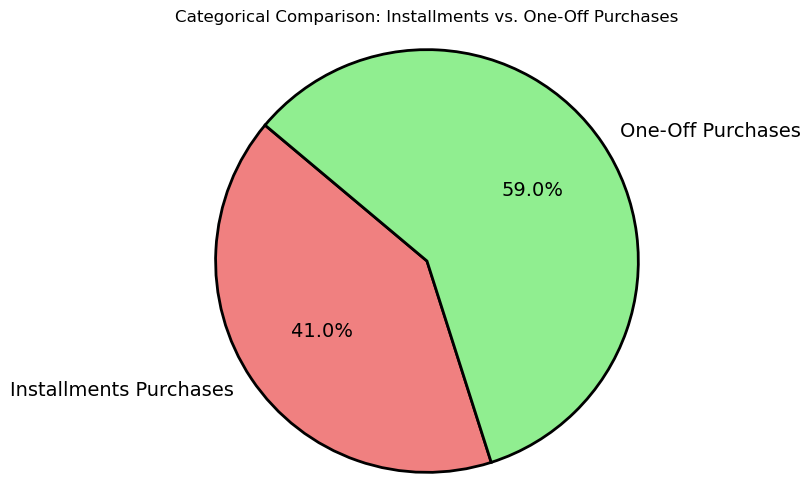

In [662]:
# calling function to plot purchases category
plot_installments_vs_oneoff(data_cleaned)

#### Line Plot- Payment over Tenure

In [654]:
def plot_payments_over_tenure(data_cleaned):
    """
    Plots the average payments over different tenure periods.
    """
    # calculate the mean of 'PAYMENTS' based on grouping Tenure
    tenure_groups = data_cleaned.groupby('TENURE')['PAYMENTS']
    mean_payments = tenure_groups.mean()

    # plotting line plot based on index and mean payments calculated
    plt.figure(figsize=(10, 6))
    plt.plot(
        mean_payments.index,
        mean_payments,
        color='red',
        label='Payments'
    )

    # Adding title and labels
    plt.title('Payments Over Tenure', fontsize=16)
    plt.xlabel('Tenure (Months)', fontsize=12)
    plt.ylabel('Payments', fontsize=12)

    # Adding gridlines for better visualization
    plt.grid(True, linestyle='--', alpha=0.6)

    # Adding legend
    plt.legend(fontsize=12)

    # Display the plot
    plt.show()

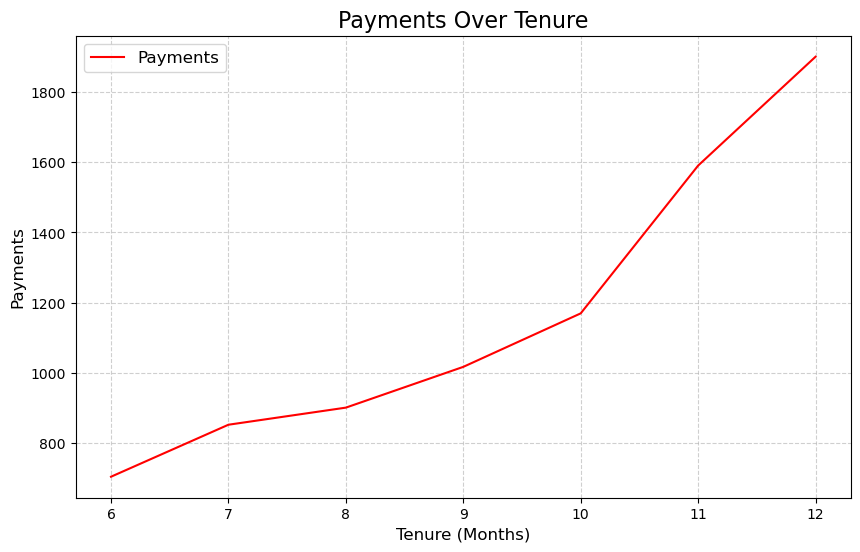

In [660]:
# calling the function and display results
plot_payments_over_tenure(data_cleaned)

## CORRELATION HEATMAP

In [601]:
def plot_correlation_heatmap(data, selected_columns):
    """
    Generates a correlation heatmap for the selected  columns in the dataset.
    """
    # Considered data from the selected columns specified below
    data_selected = data[selected_columns]

    # Compute the correlation matrix
    correlation_matrix = data_selected.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))  # Adjust size for better visibility
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='coolwarm',
                fmt=".2f",
                linewidths=0.5)
    plt.title('Correlation Heatmap of Selected Features')
    plt.show()


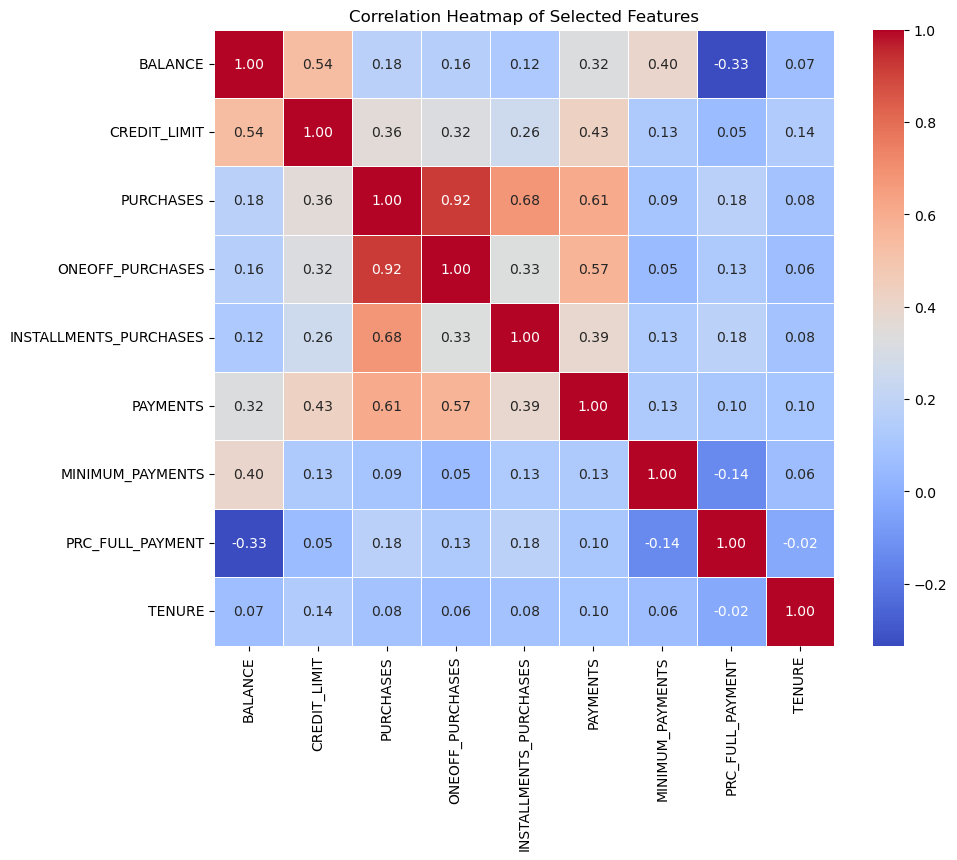

In [658]:
# selecting columns for finding corelation
selected_columns = ['BALANCE', 'CREDIT_LIMIT', 
                    'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                    'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','TENURE']

# Call the function with the data and selected columns
plot_correlation_heatmap(data_cleaned, selected_columns)


## Fitting function

In [543]:
def linear_fit(x, y):
    """
    Compute the slope and intercept using least-squares method.

    Returns slope, intercept, and residuals.
    """
    # finding mean value
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calculate slope (m)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    slope = numerator / denominator

    # Calcuate intercept
    intercept = y_mean - slope * x_mean

    # Calculate fit line equation and residuals
    fitted_values = slope * x + intercept
    residuals = y - fitted_values

    return slope, intercept, residuals, fitted_values


## SCATTER PLOT WITH LINE FITTING 

In [597]:
def plot_line_fitting_with_data(x, y):
    """
    Plot the scatter points, regression line, confidence interval,error bar.
    """
    slope, intercept, residuals, fitted_values = linear_fit(x, y)

    # Calculate standard error
    std_error = np.std(residuals, ddof=2)

    # Calculate degrees of freedom
    df = len(x) - 2

    # Calculate the t-value
    t_value = t.ppf(0.95, df)

    # Calculate error margin
    margin_of_error = t_value * std_error

    # Calculate upper and lower bounds of the confidence interval
    ci_upper = fitted_values + margin_of_error
    ci_lower = fitted_values - margin_of_error

    # Sort x and corresponding y values for plotting
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    fitted_sorted = fitted_values[sorted_indices]
    ci_upper_sorted = ci_upper[sorted_indices]
    ci_lower_sorted = ci_lower[sorted_indices]

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, alpha=1.0, label='Data Points', s=50)
    plt.plot(x_sorted, fitted_sorted,
             color='red', linewidth=1.5,
             label=f'Fit : y={slope:.2f}x + {intercept:.2f}')

    plt.fill_between(x_sorted, ci_lower_sorted, ci_upper_sorted,
                     color='grey', alpha=0.3,
                     label='95% Confidence Interval', linestyle='--')
    plt.fill_between(x_sorted,
                     fitted_sorted+std_error, fitted_sorted-std_error,
                     edgecolor='black', color='green',
                     alpha=0.2, label="Std error")

    # Labels and legend
    plt.title('One-Off Purchases vs Total Purchases')
    plt.xlabel('One-Off Purchases ($)')
    plt.ylabel('Total Purchases ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


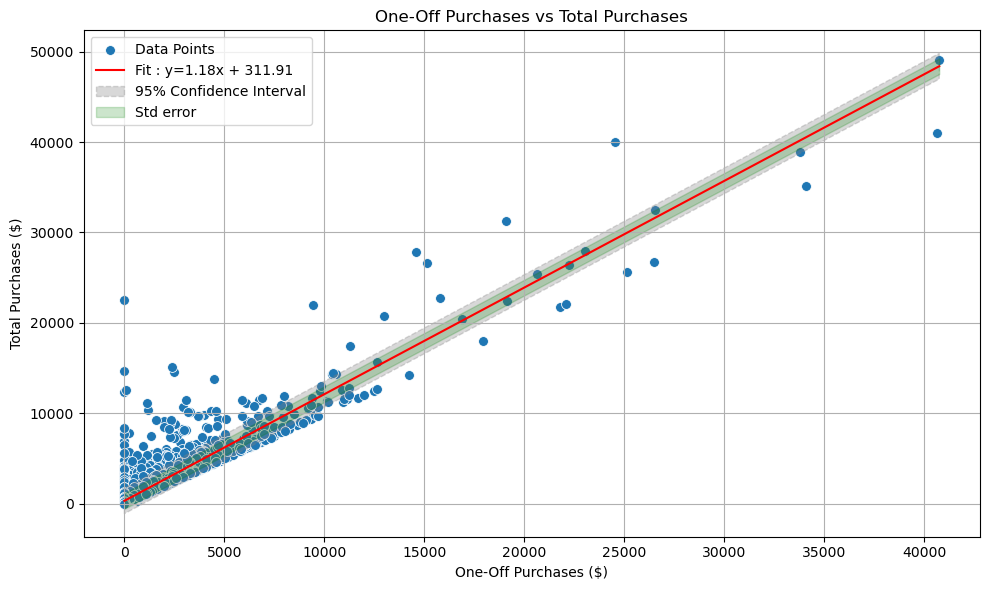

In [599]:
# Fetching the column values
oneoff_purchases = data_cleaned['ONEOFF_PURCHASES'].values
total_purchases = data_cleaned['PURCHASES'].values
# Plot the results
plot_line_fitting_with_data(oneoff_purchases, total_purchases)

## Silhouette Plot

In [551]:
def plot_silhouette_scores(data,):

    # List to store silhouette scores
    silhouette_scores = []  

    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
        print(f"k = {k}: Silhouette Score = {score:.4f}")

    # Plot the silhouette scores
    plt.figure(figsize=(10, 6))
    x=range(2,11)
    plt.plot(x, silhouette_scores, marker='o', linestyle='-', color='b')
    plt.title('Silhouette Scores for Different Values')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.xticks(range(2, 11))
    plt.grid(True)
    plt.show()

k = 2: Silhouette Score = 0.7259
k = 3: Silhouette Score = 0.6064
k = 4: Silhouette Score = 0.6221
k = 5: Silhouette Score = 0.4886
k = 6: Silhouette Score = 0.5193
k = 7: Silhouette Score = 0.4842
k = 8: Silhouette Score = 0.4511
k = 9: Silhouette Score = 0.4582
k = 10: Silhouette Score = 0.4432


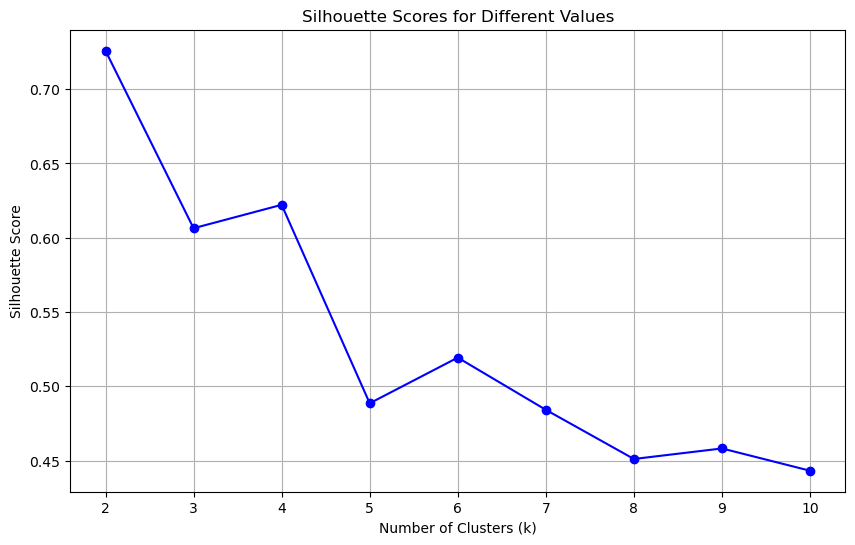

In [553]:
# selecting columns
X_balance_payments = data_cleaned[['BALANCE', 'PAYMENTS']]

# Calculate and plot silhouette scores
plot_silhouette_scores(X_balance_payments)


## Clustering function

In [621]:
def perform_kmeans_clustering(data, n_clusters):
    """
    Perform KMeans clustering on the provided dataset.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)

    # Cluster centroids
    centroids = kmeans.cluster_centers_
    xkmeans = centroids[:, 0]
    ykmeans = centroids[:, 1]

    return kmeans, kmeans_labels, xkmeans, ykmeans
    

## Scatter plot with clustering Implementation

In [616]:
def plot_kmeans_clustering(data, data_scaled):
    """
    Plot the KMeans clustering result along with the centroids.
    """
    # Perform KMeans clustering
    kmeans, kmeans_labels, xkmeans, ykmeans = perform_kmeans_clustering(data_scaled, n_clusters=3)

    # Scale centroids back to the original feature
    scaler = StandardScaler()
    scaler.fit(data)
    centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(data['BALANCE'], data['PAYMENTS'],
                c=kmeans_labels, cmap='viridis', s=30, label='Clusters')

    # Plot the centroids (original scale)
    plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
                s=200, c='red', marker='X', label='Centroids')

    # Add labels, title, and legend
    plt.title('KMeans Clustering of BALANCE vs PAYMENTS (Scaled Data)')
    plt.xlabel('BALANCE')
    plt.ylabel('PAYMENTS')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


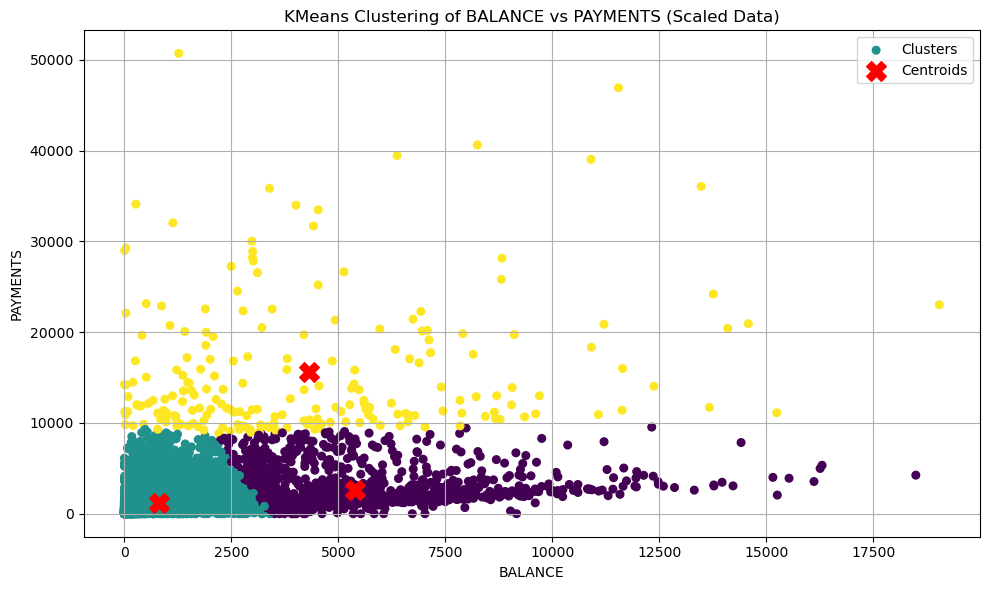

In [618]:
# Prepare the data
data_cleaned = data[['BALANCE', 'PAYMENTS']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Plot the clustering result
plot_kmeans_clustering(data_cleaned, data_scaled)